# INSURANCE ANALYSIS

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing as pr

ins_data = pd.read_csv('C:\\Users\\user\\Documents\\my app\\python_project\\DataScience\\Database\\insurance.csv')


In [5]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
ins_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [15]:
age_ins = ins_data['children'].unique()
age_ins

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [75]:
ins_data.shape

(1338, 7)

In [17]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
ins_data.sample(10)

,age,sex,bmi,children,smoker,region,charges
842,23,female,32.780,2,yes,southeast,36021.01120
1051,64,male,26.410,0,no,northeast,14394.55790
701,50,female,44.745,0,no,northeast,9541.69555
545,49,male,25.840,2,yes,northwest,23807.24060
808,18,male,30.140,0,no,southeast,1131.50660
1133,52,female,18.335,0,no,northwest,9991.03765
542,63,female,36.300,0,no,southeast,13887.20400
173,35,female,34.800,1,no,southwest,5246.04700
1136,44,female,25.000,1,no,southwest,7623.51800
386,58,female,39.050,0,no,southeast,11856.41150


In [20]:
nums = ['age','bmi','children','charges']
obj = ['sex','smoker','region']

In [19]:
ins_data[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
ins_data[obj].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [24]:
for col in obj:
    print(f'Values count column {col}')
    print(ins_data[col].value_counts())
    print()

Values count column sex
male      676
female    662
Name: sex, dtype: int64

Values count column smoker
no     1064
yes     274
Name: smoker, dtype: int64

Values count column region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



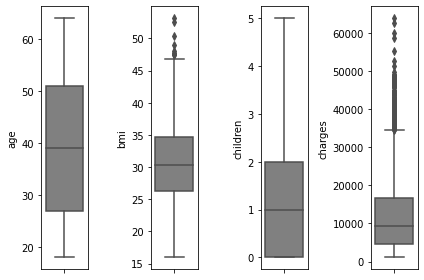

In [28]:
for i in range(0,len(nums)):
    plt.subplot(1,len(nums),i+1)
    sns.boxplot(y=ins_data[nums[i]],color='gray',orient='v')
    plt.tight_layout()

C:\Users\user\AppData\Local\Temp/ipykernel_6800/2899504156.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,len(nums)/2,i+1)
c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\AppData\Local\Temp/ipykernel_6800/2899504156.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2,len(nums)/2,i+1)
c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\

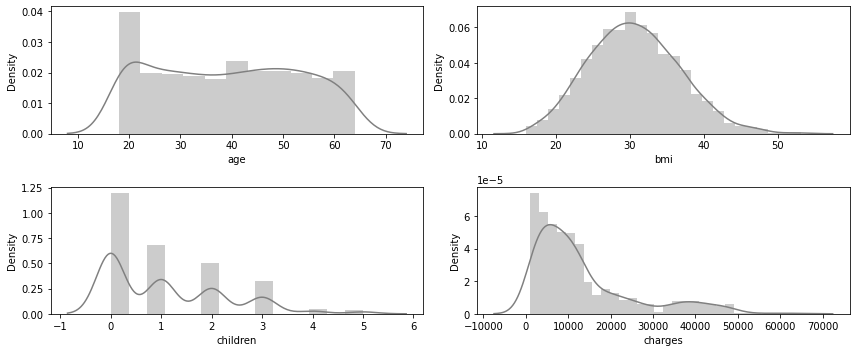

In [37]:
plt.figure(figsize=(12,5))
for i in range(0,len(nums)):
    plt.subplot(2,len(nums)/2,i+1)
    sns.distplot(ins_data[nums[i]],color='gray')
    plt.tight_layout()

c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\user\Documents\my app\python_project\DataScience\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

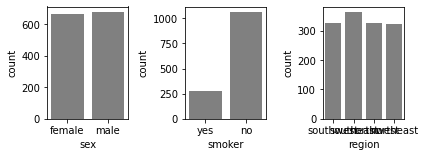

In [39]:
for i in range(0,len(obj)):
    plt.subplot(2,3,i+1)
    sns.countplot(ins_data[obj[i]],color='gray')
    plt.tight_layout()

In [40]:
ins_data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [45]:
le = pr.LabelEncoder()
ins_data['smoker'] = le.fit_transform(ins_data['smoker'])
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [74]:
data_smoker = ins_data.groupby('sex')

data_sex = data_smoker['smoker'].sum()




137.0

In [47]:
data_age = pd.DataFrame({
    'region' : ins_data.region,
    'children' : ins_data.children,
    'age' : ins_data.age,
})

In [71]:
data_age_region = data_age.pivot_table(index='children',columns='age',aggfunc='sum')

In [72]:
data_age_region.iloc[1]

        age
region  18     southeastsoutheastsoutheastsoutheastsoutheasts...
        19     southwestsouthwestsouthwestnorthwestsouthwestn...
        20     northwestsouthwestsoutheastsoutheastnorthwests...
        21         southwestnortheastnortheastsouthwestsouthwest
        22                  southeastnorthwestnorthwestsoutheast
        23     northwestsouthwestsoutheastnorthwestnortheasts...
        24                                             northwest
        25     northeastsoutheastnorthwestsoutheastsoutheasts...
        26     northeastsoutheastsouthwestsoutheastsoutheasts...
        27     southeastsoutheastsouthwestnortheastnortheastn...
        28     southwestnorthwestsoutheastnortheastnortheasts...
        29     southeastsoutheastnortheastnortheastnortheasts...
        30     southwestnortheastsoutheastnorthwestsoutheasts...
        31     northeastnorthwestnorthwestnortheastsoutheasts...
        32     northeastsoutheastsoutheastnortheastsoutheastn...
        33   

In [81]:
test = pd.DataFrame({
    'nama':['adi','vio','beni','love','ha'],
    'badan': [170, 157, 182, 140, 169]
})

test.badan.mean()

163.6